## Merge multiple masks

The masks are used to not account for unreliable regions of the experiment (shadows, bigger pixels on the edges, pixels not working properly, etc). See https://github.com/kbeyerlein/CsPadMaskMaker.git

Sometimes it is easier to handle just one file mask. Here I am iterating over the multiple masks to merge in one mask.

In [1]:
path="/path/to/masks"

In [5]:
masks =[path+"/mask_edges.h5", path+"/mask_asic.h5", path+"/mask_beamstop.h5", path+"/mask_dark_0_20240304_022539.h5",  path+"/mask_borders.h5" ]

In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [7]:
f = h5py.File(masks[0], "r")
shape=f['data/data'].shape
f.close()

In [8]:
merged_mask=np.ones(shape, dtype=np.int32)

In [9]:
for mask_file in masks:
    f = h5py.File(mask_file, "r")
    mask=np.array(f['data/data'])
    f.close()
    merged_mask=merged_mask*mask

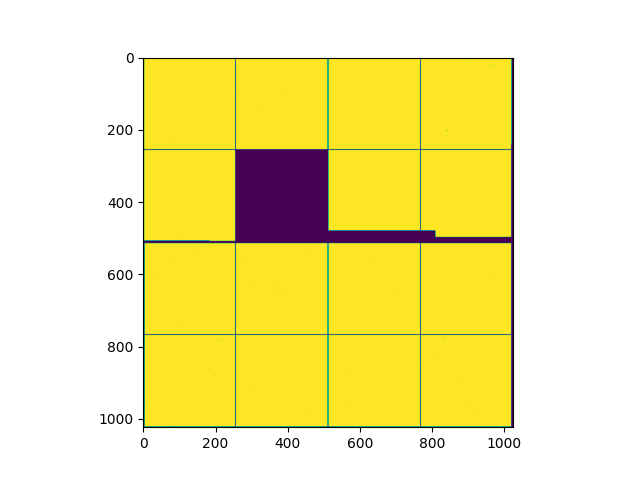

In [10]:
%matplotlib widget
plt.imshow(merged_mask)
plt.show()

In [11]:
f = h5py.File(path+"/merged_mask.h5", "w")
data= f.create_group("data")
data.create_dataset("data", data=merged_mask)
f.close()